In [ ]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
What_country = 'India'
job_lists = df['job_title_short'].value_counts().head(3).index.to_list()
df_IN = df[(df['job_country']==What_country)].copy()
df_IN_DJ = df[(df['job_country']==What_country ) & (df['job_title_short'].isin(job_lists))].copy()

In [ ]:
df_IN_DJ = df_IN_DJ.explode('job_skills').copy()
df_count_skills = df_IN_DJ.groupby(['job_skills','job_title_short']).size()
df_count_skills = df_count_skills.reset_index(name='Skills Counts')
df_count_skills = df_count_skills.sort_values(by='Skills Counts', ascending=False)
df_count_skills

,job_skills,job_title_short,Skills Counts
476,sql,Data Engineer,12993
378,python,Data Engineer,11568
379,python,Data Scientist,9248
461,spark,Data Engineer,7157
37,aws,Data Engineer,6993
...,...,...,...
498,symfony,Data Engineer,1
76,cobol,Data Scientist,1
78,codecommit,Data Scientist,1
64,centos,Data Analyst,1


In [ ]:
df_job_title_count =  df_IN['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [ ]:
df_skills_perc = pd.merge(df_count_skills,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['skills_percent'] = 100*(df_skills_perc['Skills Counts'] / df_skills_perc['job_total'])
df_skills_perc

,job_skills,job_title_short,Skills Counts,job_total,skills_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
588,symfony,Data Engineer,1,19062,0.005246
589,cobol,Data Scientist,1,13279,0.007531
590,codecommit,Data Scientist,1,13279,0.007531
591,centos,Data Analyst,1,6121,0.016337


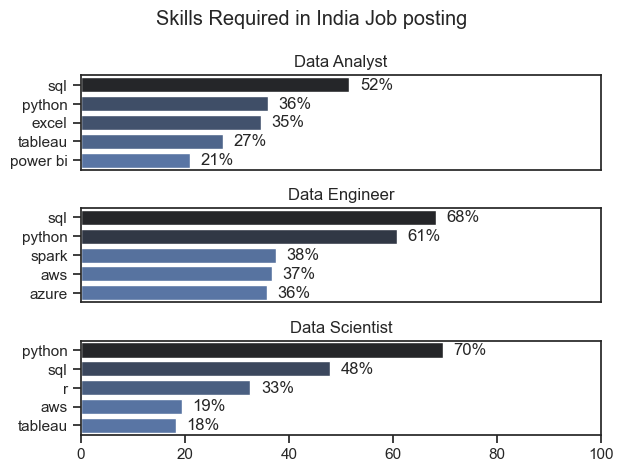

In [ ]:
df_list_top_job = {
    job_list: df_IN_DJ[df_IN_DJ['job_title_short'] == job_list]
    for job_list in job_lists
}
fig, ax = plt.subplots(len(job_lists),1)
sns.set_theme(style='ticks')
for i , job_title in enumerate(df_list_top_job):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skills_percent',ax=ax[i],title=job_title,legend=False)
    sns.barplot(
        data=df_plot,
        x='skills_percent',
        y='job_skills',
        ax=ax[i],
        hue='skills_percent',
        palette='dark:b_r',
        legend=False
    )
    
    # Set labels and title for each subplot
    ax[i].set_title(f"{job_title}")
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,100)
    if i !=len(df_list_top_job)-1:
        ax[i].set_xticks([])
    for n ,v  in enumerate(df_plot['skills_percent']):
        ax[i].text(v+2,n,f'{v:.0f}%',va='center')

fig.suptitle(f'Skills Required in {What_country} Job posting')
fig.tight_layout()

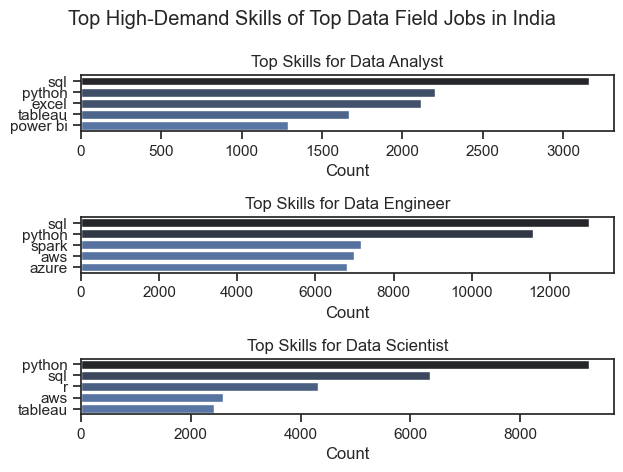

In [ ]:
df_IN_DJ = df_IN_DJ.explode('job_skills')

df_list_top_job = {
    job_list: df_IN_DJ[df_IN_DJ['job_title_short'] == job_list]
    for job_list in job_lists
}

fig, ax = plt.subplots(3, 1)

for i, job in enumerate(df_list_top_job):
    # Prepare data for seaborn
    skill_counts = (
        df_list_top_job[job]['job_skills']
        .value_counts()
        .head(5)
        .reset_index()
    )
    skill_counts.columns = ['job_skills', 'count']
    
    # Plot
    sns.barplot(
        data=skill_counts,
        x='count', y='job_skills',
        ax=ax[i],
        hue='count',
        palette='dark:b_r',
        legend=False
    )
    
    # Set labels and title for each subplot
    ax[i].set_title(f"Top Skills for {job}")
    ax[i].set_xlabel("Count")
    ax[i].set_ylabel("")

# Main title for whole figure
plt.suptitle("Top High-Demand Skills of Top Data Field Jobs in India")
plt.tight_layout()
plt.show()
